# Neural Networks for Fashion Image Classification and Visual Search

## BT5153 Applied Machine Learning Group Project
#### Authors: Fengzi Li (A0206468Y) | Shashi Kant (A0206456E) | Shunichi Araki (A0206507L) | Sumer Bangera (A0206510X) | Swapna Samir Shukla (A0206512U)*

*All authors are graduate students of MSBA program Class of 2020 at NUS Business School.

### This Notebook searving for: Visual Search

## Loading kaggle dataset

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "qazxsw2317" # username from the json file
os.environ['KAGGLE_KEY'] = "17e2c46c58255a25f73e591f7e278de7" # key from the json file

In [0]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-small

 97% 547M/565M [00:04<00:00, 108MB/s]
100% 565M/565M [00:04<00:00, 124MB/s]


In [0]:
! unzip 'fashion-product-images-small.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [0]:
DATASET_PATH = "/content/myntradataset/"
print(os.listdir(DATASET_PATH))

['styles.csv', 'images']


## Data preparation before making image search model

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import pandas as pd 

In [0]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [0]:
df.shape

(5000, 11)

In [0]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() 
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img):
    return cv2.imread(img_path(img))

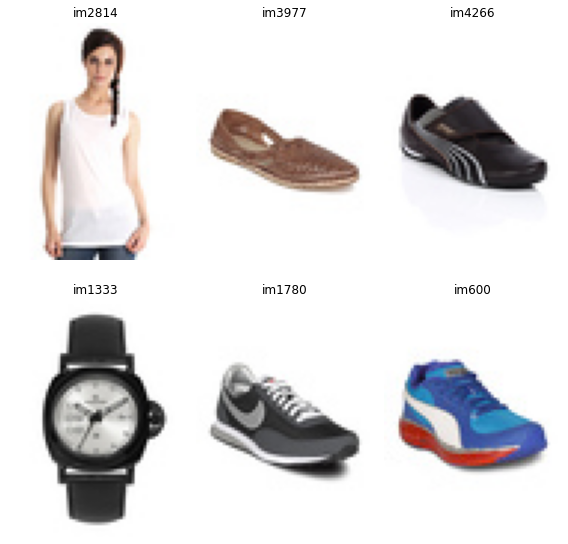

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

## Use Pre-Trained Model(ResNet50) to create image search model

In [0]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D

In [0]:
# Input Shape
img_width, img_height, _ = load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 3, 2, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [0]:
pip install swifter

     |████████████████████████████████| 450kB 4.1MB/s 
     |████████████████████████████████| 614kB 32.0MB/s 
  Created wheel for psutil: filename=psutil-5.7.0-cp36-cp36m-linux_x86_64.whl size=272678 sha256=34db8138b4c6d6d62d9985e750a726ae27c1dc02450b4c7b06725cfe9cf08b40
  Stored in directory: /root/.cache/pip/wheels/d7/69/b4/3200b95828d1f0ddb3cb5699083717f4fdbd9b4223d0644c57
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=fbb9a8b5a72428b7637189ae7a9b608ec8f9081ceff2e059f61b605aefb8e9da
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built psutil locket
ERROR: distributed 2.14.0 has requirement tornado>=5; python_version < "3.8", but you'll have tornado 4.5.3 which is incompatible.
  Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1

Get embedding vector for each image data

In [0]:
%%time
import swifter

# Parallel apply
map_embeddings = df['image'].swifter.apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)


(5000, 2048)
CPU times: user 7min 43s, sys: 18.8 s, total: 8min 2s
Wall time: 6min


In [0]:
df_embs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,3.539251,0.000000,1.094596,0.000000,0.000000,4.458532,2.446016,2.678129,0.0,3.914631,1.422393,1.157283,0.000000,1.880764,0.0,0.0,3.269925,0.000000,11.893178,0.000000,1.452368,0.000000,0.0,0.000000,0.000000,0.000000,2.073373,0.0,0.000000,0.0,5.080476,1.391906,12.459064,2.493238,0.399840,0.0,0.731082,0.258778,1.375271,...,3.075200,3.41948,0.000000,0.000000,1.286983,0.000000,0.00000,0.000000,0.000000,1.393044,0.000000,1.660433,0.000000,0.000000,0.497360,0.00000,2.110276,0.435468,9.724483,0.215351,0.0,4.708140,0.000000,0.0,0.000000,0.000000,0.873243,0.000000,0.191963,0.031801,0.424306,0.000000,0.000000,5.880401,0.000000,0.000000,6.428887,4.408068,0.950041,1.847196
1,1.879337,1.600883,0.092029,4.433076,0.000000,0.000000,3.030766,8.530593,5.498661,0.0,0.000000,7.017092,0.000000,1.364954,5.615795,0.0,0.0,0.000000,0.152287,10.503733,0.000000,2.551051,2.986596,0.0,0.000000,3.486579,0.000000,3.006349,0.0,0.784937,0.0,4.231045,2.262224,0.000000,0.000000,0.000000,0.0,9.121507,0.000000,8.852417,...,3.296726,0.00000,0.000000,0.669539,0.000000,0.000000,0.00000,0.000000,0.000000,2.039625,0.000000,0.675682,5.739604,0.000000,0.000000,0.03763,1.846460,5.292167,1.975237,6.109930,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.738020,0.000000,3.759240,2.808288,0.000000,3.923482,3.183098,0.000000,0.000000,4.244201,3.268898,2.271732,5.433384
2,0.000000,0.311195,0.000000,3.808685,0.437032,7.112497,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.183247,0.000000,0.0,0.0,2.236697,0.180064,0.000000,3.487832,0.000000,0.000000,0.0,0.722539,0.395576,2.738959,0.000000,0.0,0.000000,0.0,0.562794,1.565978,0.000000,2.126893,15.926027,0.0,0.000000,0.000000,4.554018,...,0.000000,0.00000,1.399163,1.579809,0.000000,0.000000,0.96009,0.000000,0.000000,16.655598,0.000000,1.602541,2.852790,0.221713,9.957947,0.00000,0.000000,0.857989,0.000000,1.269109,0.0,0.000000,0.612414,0.0,1.764397,0.213959,0.000000,2.256892,0.000000,5.460070,0.218204,7.861292,1.655935,0.000000,0.000000,0.000000,4.703019,0.000000,2.340575,0.000000
3,0.588019,9.894619,0.000000,6.295311,1.783726,1.913124,0.000000,13.309933,7.805776,0.0,0.000000,5.977784,0.000000,0.608627,4.007223,0.0,0.0,0.000000,4.598935,13.648184,0.000000,0.000000,14.810142,0.0,0.000000,6.652885,0.000000,4.646013,0.0,0.473860,0.0,3.364133,0.437096,3.326417,0.138498,0.000000,0.0,4.190766,0.000000,0.020679,...,5.066573,0.00000,0.000000,2.253833,0.000000,2.684992,0.00000,0.000000,0.000000,2.171809,9.113696,4.865502,21.463577,0.000000,0.111593,0.00000,2.444345,1.588732,6.070646,2.827567,0.0,7.723210,0.000000,0.0,0.871971,0.000000,0.000000,2.010664,0.000000,4.141375,22.434387,0.000000,0.000000,0.000000,2.565925,3.330481,0.594367,1.130457,3.084231,7.608922
4,0.000000,1.882977,0.000000,5.122101,0.000000,0.000000,2.950287,6.626857,1.606636,0.0,0.004746,3.475130,0.000000,0.000000,0.720383,0.0,0.0,4.533977,0.253924,7.577389,0.000000,7.151679,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.083778,5.430902,2.236609,0.000000,0.0,0.732410,0.000000,2.389460,...,7.387797,3.04741,0.000000,0.000000,0.898806,0.000000,0.00000,0.115986,0.583247,2.020007,3.349904,2.007031,0.000000,0.000000,0.000000,0.00000,0.628917,1.910987,6.206245,1.472732,0.0,10.508315,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.504942,0.000000,1.274126,3.484575,0.786349,0.000000,1.597857,2.515497,0.068352,0.000000


Compute cosine similarity between items to compare the similarity of photos

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.9999994 , 0.5813053 , 0.23863798, 0.49294078],
       [0.5813053 , 0.9999994 , 0.23951328, 0.7227348 ],
       [0.23863798, 0.23951328, 1.        , 0.22011638],
       [0.49294078, 0.7227348 , 0.22011638, 1.        ]], dtype=float32)

Make recommender for similar photos

In [0]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([259, 4305, 0, 2779, 2701], dtype='int64'),
 [0.9040971, 0.8925513, 0.89175564, 0.8855503, 0.8812927])

### visualize image search result

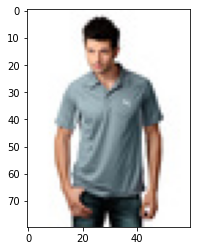

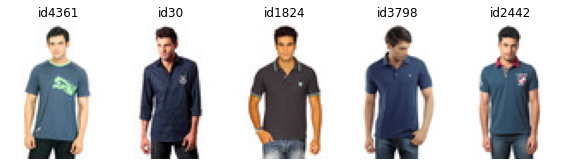

In [0]:
# Idx Item to Recommender
idx_ref = 4

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 5)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'id'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 3 columns
plot_figures(figures, 1, 5)

Search for items similar to the reference to recommend top 6 photos  

## Try external photos to confirm the accuracy of this recommendation model

In [0]:
# create new data path for test pictures
DATASET_PATH_TEST = "/content/myntradataset/testimage/"

picked up several images on the Internet  
reshape photo size to fit kaggle dataset and model because these photos have different pixcel size

In [0]:
width,height=60,80 #size of kaggle dataset

for i in range(1,16): #picked 15 images for external photo testing
  test_img = plt.imread(DATASET_PATH_TEST + str(i) + ".jpg")
  test_reshape_img = cv2.resize(test_img,(width, height))
  cv2.imwrite(str(i)+'.jpg',test_reshape_img)

In [0]:
# create dataframe for test images
df_test = pd.DataFrame(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]), columns=['testimage'])
df_test = df_test.apply(lambda row: str(row['testimage']) + ".jpg", axis=1)
df_test = pd.DataFrame(df_test, columns=['testimage'])
df_test.head()

,testimage
0,1.jpg
1,2.jpg
2,3.jpg
3,4.jpg
4,5.jpg


In [0]:
def img_path_test(img):
    return DATASET_PATH+"/testimage/"+img

def load_image_test(img):
    return cv2.imread(img_path_test(img))

Check rondomly selected testing images which is resized to 80*60 pixel

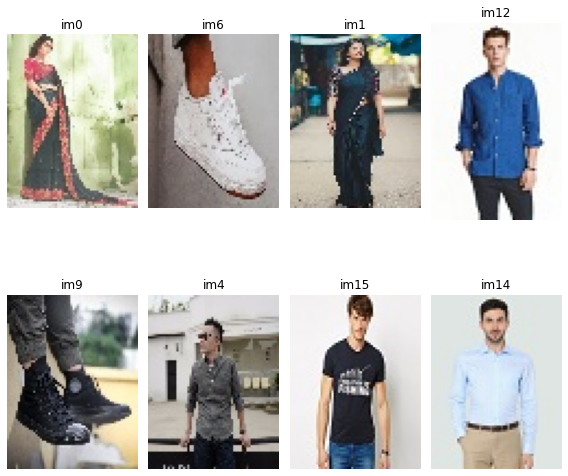

In [0]:
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image_test(row.testimage) for i, row in df_test.sample(8).iterrows()}
# plot of the images in a figure, with 3 rows and 4 columns
plot_figures(figures, 2, 4)

Apply embedding function to testing images

In [0]:
def get_embedding_test(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [0]:
map_embeddings_test = df_test["testimage"].swifter.apply(lambda img: get_embedding_test(model, img))
df_test_embs        = map_embeddings_test.apply(pd.Series)

print(df_test_embs.shape)
df_test_embs.head()


(16, 2048)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,6.099230,2.611456,0.00000,6.818676,4.554691,3.867265,5.940579,5.283195,3.191139,0.249534,6.732159,2.776634,6.884019,0.000000,0.000000,0.000000,0.190532,1.634756,0.000000,8.897629,0.000000,0.000000,12.299174,0.0,1.492932,0.000000,0.036559,0.291752,1.636316,0.000000,0.000000,0.000000,2.870515,5.470017,0.000000,0.000000,0.000000,9.975677,1.805482,0.000000,...,0.470816,4.566734,0.000000,0.000000,0.000000,3.094821,0.000000,0.000000,0.0,0.000000,6.237189,1.437675,9.739041,0.000000,0.355299,0.000000,0.000000,0.000000,2.177021,1.490539,2.889542,11.258726,13.486399,0.607809,0.000000,0.000000,3.332594,2.601209,2.393335,9.160452,0.000000,0.074088,0.000000,4.438202,0.067516,3.007493,0.849189,2.918943,10.717741,0.000000
1,0.976961,7.298285,5.61603,0.000000,0.000000,1.406114,1.536181,2.830389,1.160753,0.000000,2.790119,8.325042,2.061405,9.358652,6.763975,1.457384,0.952492,0.000000,3.016186,10.384801,9.952963,3.206575,11.990061,0.0,0.000000,0.667726,0.000000,5.399014,0.000000,1.288814,0.090149,12.771771,6.881441,10.907098,0.000000,3.718926,0.000000,2.520853,0.000000,5.801522,...,6.343779,0.000000,0.880366,0.000000,0.724108,20.084280,5.905623,0.000000,0.0,0.000000,0.841248,3.491289,0.000000,2.758959,0.123975,0.000000,1.498549,0.000000,4.123056,1.273314,3.947959,0.000000,0.406885,0.000000,0.682758,0.000000,0.000000,1.004827,0.000000,0.000000,0.000000,0.000000,0.277896,2.475353,0.000000,0.837448,0.000000,3.969829,0.464856,9.330281
2,1.113724,6.813021,0.00000,7.863928,4.422255,0.000000,5.182113,0.617618,3.135995,1.194622,0.000000,7.432676,0.795359,0.000000,0.261282,0.000000,0.000000,0.000000,1.331852,6.743855,2.446154,0.000000,2.625169,0.0,0.000000,3.378628,0.381214,0.569596,3.512502,4.229771,0.000000,9.824869,0.792917,4.016965,3.735104,7.380786,0.000000,14.896988,1.157874,2.722116,...,0.000000,17.469406,2.650132,2.797364,0.000000,4.627118,0.000000,0.603019,0.0,1.625423,4.503898,2.868564,1.831905,0.000000,0.000000,0.000000,1.027579,0.000000,9.847513,0.000000,0.000000,0.000000,2.043540,2.496861,1.264406,0.000000,0.000000,6.515845,0.000000,0.000000,1.181818,0.000000,0.000000,0.000000,3.085120,1.377947,0.088788,3.346792,3.503876,0.000000
3,0.000000,2.639928,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.729419,0.779034,3.006481,4.180869,0.000000,0.000000,0.000000,2.663411,5.664063,12.314451,1.566703,0.657188,0.000000,0.000000,1.866875,0.0,0.000000,2.788877,0.000000,0.000000,0.000000,0.000000,0.000000,14.156654,3.150850,1.681237,0.000000,2.330967,0.912633,7.492448,0.000000,0.000000,...,3.025285,4.466887,0.000000,1.428957,2.064400,7.635519,0.662802,2.276064,0.0,0.000000,0.793671,0.992257,0.000000,3.109529,0.000000,13.341118,0.000000,0.000000,5.033376,0.000000,6.972485,0.588727,0.000000,0.000000,0.000000,0.602561,0.639599,0.000000,0.000000,0.000000,0.000000,5.880445,1.566385,1.416599,0.000000,0.000000,1.379822,0.000000,1.105201,4.114900
4,0.896766,3.220120,0.00000,8.885319,1.681902,0.000000,11.560344,11.708332,15.254415,0.000000,0.000000,3.536199,0.000000,0.585765,0.080994,0.000000,0.000000,4.963247,0.000000,14.272554,0.790554,0.000000,0.000000,0.0,0.000000,3.685548,0.000000,0.115961,0.000000,0.000000,0.000000,9.241262,1.107078,2.868291,0.000000,4.362256,0.000000,2.539491,0.000000,5.251881,...,5.731920,6.532792,1.435068,4.733493,0.000000,2.158830,0.000000,0.000000,0.0,0.000000,0.000000,4.020100,0.000000,0.000000,0.000000,2.205031,3.194141,6.570175,9.312049,7.981432,0.185797,1.901225,0.000000,0.000000,0.000000,0.829776,0.169320,1.147945,0.000000,0.000000,0.999794,2.445223,10.602821,4.488823,3.385484,0.062161,5.435441,0.586276,0.000000,6.819180


Add test photos embedding vectors data into existing kaggle data  
Then compute the cosine similality

In [0]:
df_embs.iloc[0:16,:] = df_test_embs

# Calcule DIstance Matriz
cosine_sim_test = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim_test[:4, :4]

array([[0.99999976, 0.38463813, 0.45432717, 0.36143148],
       [0.38463813, 1.        , 0.41783518, 0.35164952],
       [0.45432717, 0.41783518, 0.99999976, 0.42537963],
       [0.36143148, 0.35164952, 0.42537963, 1.        ]], dtype=float32)

In [0]:
indices_test = pd.Series(range(len(df_embs)), index=df_embs.index)
indices_test

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender_test(idx, df, top_n = 5):
    sim_idx    = indices_test[idx]
    sim_scores = list(enumerate(cosine_sim_test[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices_test.iloc[idx_rec].index, idx_sim

get_recommender_test(11, df, top_n = 3)

(Int64Index([599, 4363, 4323], dtype='int64'),
 [0.70908505, 0.69365525, 0.690617])

### visualize image search result for extarnal pictures

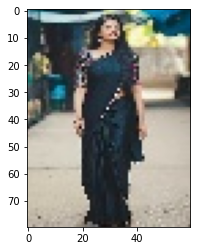

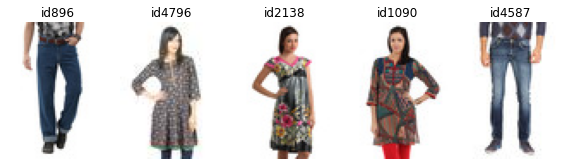

In [0]:
# Idx Item to Recommender
idx_ref = 1
# Recommendations
idx_rec, idx_sim = get_recommender_test(idx_ref, df, top_n = 5)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image_test(df_test.iloc[idx_ref].testimage), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'id'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 3 columns
plot_figures(figures,1, 5)

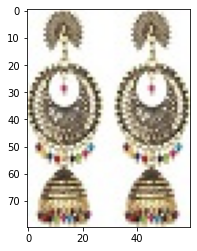

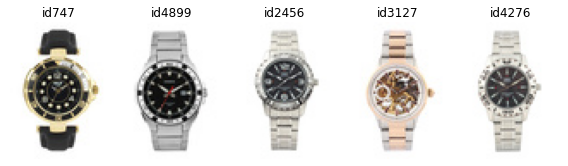

In [0]:
idx_ref = 13
idx_rec, idx_sim = get_recommender_test(idx_ref, df, top_n = 5)

plt.imshow(cv2.cvtColor(load_image_test(df_test.iloc[idx_ref].testimage), cv2.COLOR_BGR2RGB))

figures = {'id'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
plot_figures(figures,1, 5)

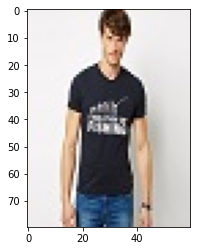

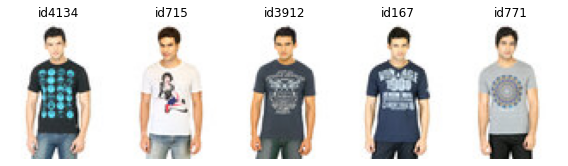

In [0]:
idx_ref = 15
idx_rec, idx_sim = get_recommender_test(idx_ref, df, top_n = 5)

plt.imshow(cv2.cvtColor(load_image_test(df_test.iloc[idx_ref].testimage), cv2.COLOR_BGR2RGB))

figures = {'id'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
plot_figures(figures,1, 5)

### References:

[1] Building a Recommendation System Using CNN

https://www.kaggle.com/marlesson/building-a-recommendation-system-using-cnn

[2] Changing pictures size

https://www.tech-tech.xyz/python-img-resize.html